In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD

# Variational mode decomposition (VMD)

\begin{gather*}
\min_{\{u_k\}, \{w_k\}}{\bigg\{\sum_k\Big|\Big|\partial_t\Big[\Big(\delta(t)+\frac{j}{\pi t}\Big)\cdot u_k(t)\Big]e^{-jw_kt}\Big|\Big|^2_2\bigg\}}
\end{gather*}

,0,1,2,3
0,58.540245,13.984005,1.208015,0.736521
1,58.534537,13.928712,1.071257,0.281331
2,58.498863,13.793094,0.782153,-0.387378
3,58.449609,13.595876,0.409694,-0.773371
4,58.415577,13.369236,0.049851,-0.556675
...,...,...,...,...
1253,81.642181,6.788812,0.587124,0.105669
1254,81.535858,6.638746,-0.670871,-0.042646
1255,81.396935,6.457215,-2.018203,-0.207759
1256,81.293335,6.320785,-3.112901,-0.257471


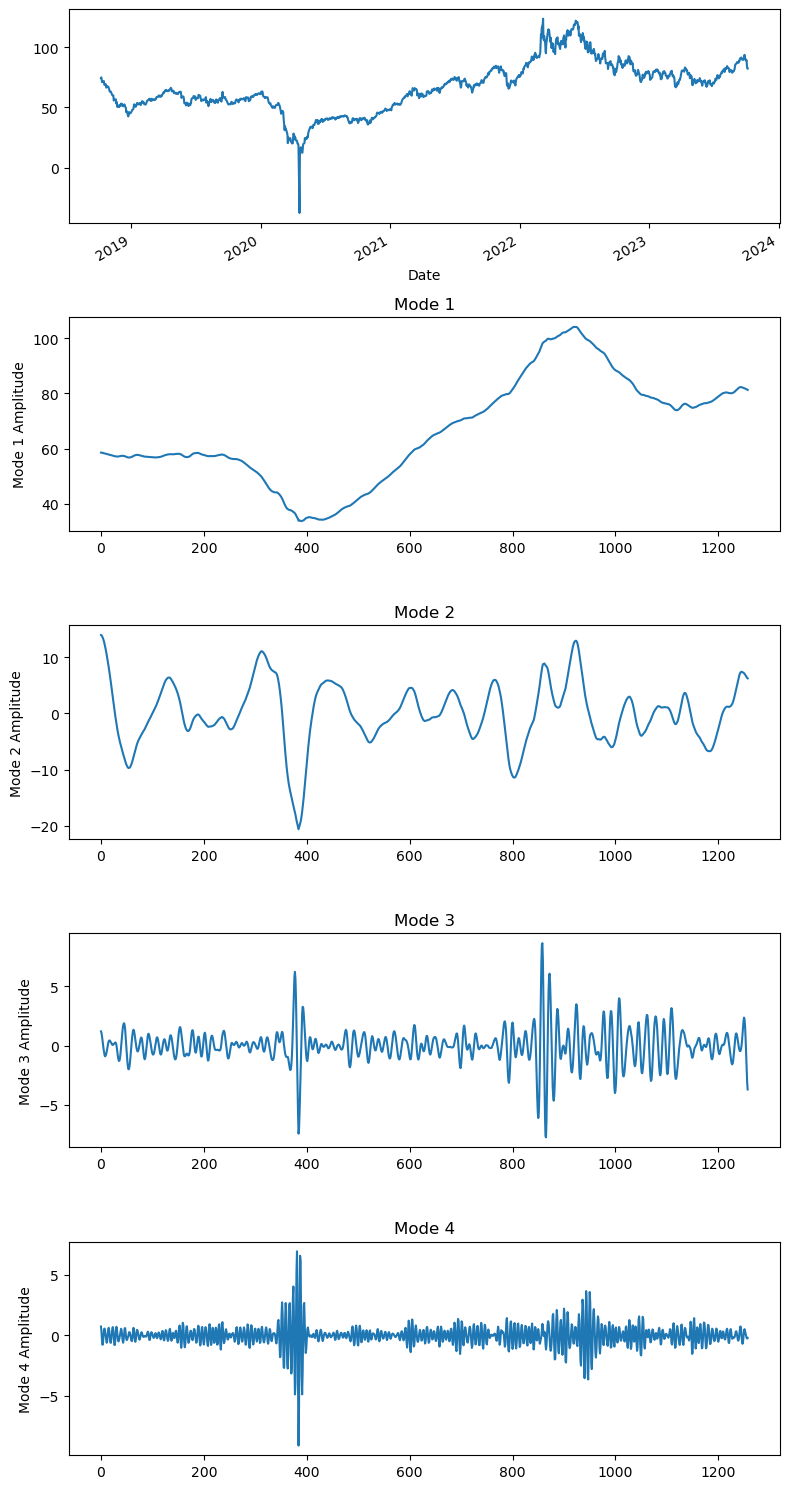

In [57]:
df = pd.read_parquet('..\data\WTI_price_and_vol.parquet')

# Define the VMD parameters
alpha = 2000    # Mode-mixing parameter
tau = 0.002     # Time step
K = 4           # Number of modes
DC = 0          # DC component removal (0 for no removal)
init = 1        # Initialization method (1 for default initialization)
tol = 1e-7      # Tolerance

u, u_hat, omega = VMD(df['CL=F'], alpha, tau, K, DC, init, tol)

df_results = pd.DataFrame(u.T)

fig, axs = plt.subplots(K + 1, figsize=(8, 3 * (K + 1)))

df['CL=F'].plot(ax=axs[0])

for i in range(K):
    df_results[i].plot(ax=axs[i + 1], title='Mode ' + str(i + 1))
    axs[i + 1].set_ylabel('Mode ' + str(i + 1) + ' Amplitude')

fig.tight_layout()

display(df_results)

